# №12. Сверточные слои. CNN

In [15]:
import torch
import torch.nn as nn

from torchvision.transforms import v2

import matplotlib.pyplot as plt

## 1. **nn.Conv2d**

<img src="data/my_images/cnn_layer_schema.png" width=800>

In [24]:
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1,
        out_channels=3,
        kernel_size=(3,3)
    ),
    nn.ReLU(),
    nn.Conv2d(
        in_channels=3,
        out_channels=3,
        kernel_size=(3,3)
    ),
    nn.Sigmoid()
)
model

Sequential(
  (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (3): Sigmoid()
)

tensor([[[[0.6968, 0.1776, 0.0992, 0.7104, 0.4195, 0.5964, 0.6261, 0.5058,
           0.2158],
          [0.2866, 0.0440, 0.2272, 0.3837, 0.1858, 0.0187, 0.3658, 0.7597,
           0.2399],
          [0.4877, 0.9403, 0.5506, 0.3646, 0.7591, 0.3233, 0.8711, 0.4718,
           0.6442],
          [0.5502, 0.6991, 0.6588, 0.9664, 0.1273, 0.8689, 0.9972, 0.6322,
           0.6607],
          [0.0933, 0.2823, 0.4677, 0.2163, 0.5543, 0.3440, 0.1018, 0.3615,
           0.4397],
          [0.1473, 0.9446, 0.4202, 0.8769, 0.4478, 0.8853, 0.9119, 0.6266,
           0.9628],
          [0.7765, 0.4607, 0.9986, 0.7055, 0.5534, 0.8820, 0.2234, 0.2522,
           0.4639],
          [0.9032, 0.4004, 0.0713, 0.1037, 0.4214, 0.6564, 0.1343, 0.3418,
           0.8284],
          [0.9987, 0.9800, 0.1243, 0.2063, 0.7060, 0.8187, 0.6960, 0.8132,
           0.5192]]]])


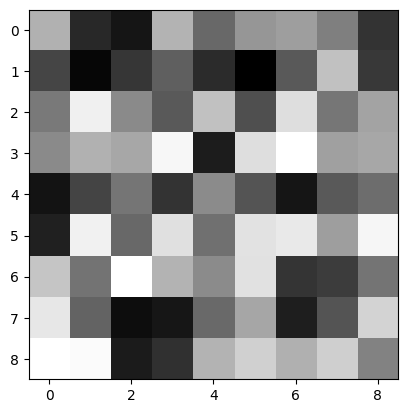

In [36]:
batch_size = 1
channels = 1
image_size = (9, 9)
x = torch.rand([batch_size, channels, *image_size], dtype=torch.float32)
print(x)
plt.imshow(x[0,0], cmap='gray')

tensor([[[0.4640, 0.4318, 0.4705, 0.4722, 0.4375],
         [0.4444, 0.4604, 0.4557, 0.4297, 0.4154],
         [0.4474, 0.4496, 0.4610, 0.4606, 0.4364],
         [0.4549, 0.4419, 0.4480, 0.4088, 0.4331],
         [0.4664, 0.4596, 0.4589, 0.4322, 0.4646]],

        [[0.5133, 0.5166, 0.5259, 0.5053, 0.4925],
         [0.5257, 0.5226, 0.5472, 0.5334, 0.5410],
         [0.5271, 0.5590, 0.5376, 0.5465, 0.5583],
         [0.5156, 0.5071, 0.5415, 0.5137, 0.4846],
         [0.5353, 0.5527, 0.5071, 0.5074, 0.5673]],

        [[0.5540, 0.5826, 0.5664, 0.5950, 0.5746],
         [0.5800, 0.5493, 0.5649, 0.6027, 0.5218],
         [0.5614, 0.5722, 0.5943, 0.5383, 0.5766],
         [0.5857, 0.6023, 0.5855, 0.6176, 0.5880],
         [0.6031, 0.5347, 0.5971, 0.5466, 0.5448]]], grad_fn=<SelectBackward0>) torch.Size([3, 5, 5])


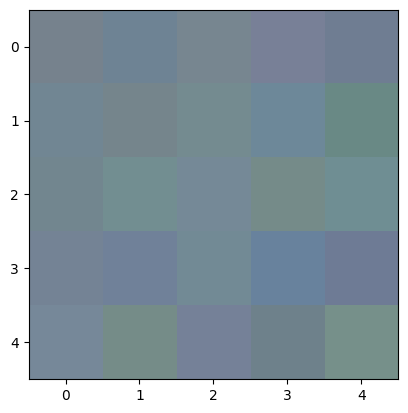

In [37]:
model.eval()
out = model(x)[0]
print(out, out.shape)
out = out.permute(1,2,0).detach().numpy()
plt.imshow(out)

## 2. model.**add_module**

In [39]:
model = nn.Sequential()
model.add_module('layer_1', nn.Conv2d(3,  32, (3, 3)))
model.add_module('relu', nn.ReLU())
model.add_module('layer_2', nn.Conv2d(32, 64, (3, 3)))
model

Sequential(
  (layer_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (layer_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)

In [40]:
input = torch.rand([16, 3, 28, 28])

out = model(input)
out.shape

torch.Size([16, 64, 24, 24])

In [42]:
model.state_dict()['layer_1.weight'].shape

torch.Size([32, 3, 3, 3])

## 3. Собственный класс CNN

In [43]:
class myCNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels, 32, (3,3))
        self.conv_2 = nn.Conv2d(32, out_channels, (3,3))
        self.act_func = nn.ReLU()
        
    def forward(self, x):
        x = self.conv_1(x)
        x = self.act_func(x)
        out = self.conv_2(x)
        return out

In [44]:
model = myCNN(3, 1)
model

myCNN(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_2): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1))
  (act_func): ReLU()
)

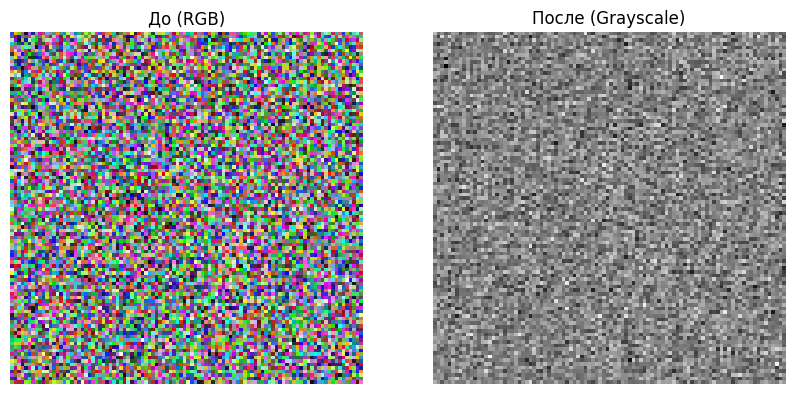

In [47]:
model.eval()
input = torch.rand([1, 3, 100, 100])
out = model(input)

input_image = input[0].permute(1, 2, 0).detach().numpy()  # [H, W, C]
output_image = out[0, 0].detach().numpy() # [H, W]

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].imshow(input_image)
axs[0].set_title("До (RGB)")
axs[0].axis('off')

axs[1].imshow(output_image, cmap='gray')
axs[1].set_title("После (Grayscale)")
axs[1].axis('off')

plt.show()

## 4. Примеры CNN

### 4.1 **Conv2d** + **Linear**

In [51]:
class MyModel(nn.Module):
    def __init__(self, out):
        super().__init__()
        self.conv_1 = nn.Conv2d(3, 32, (3, 3))    # (batch_size, 3, 28, 28) => (batch_size, 32, 26, 26)
        self.conv_2 = nn.Conv2d(32, 64, (3, 3))    # (batch_size, 32, 26, 26) => (batch_size, 64, 24, 24)
        
        self.flatten = nn.Flatten()    # (batch_size, 64, 24, 24) => (batch_size, 64*24*24)
        self.act = nn.ReLU()
        
        self.layer_1 = nn.Linear(64*24*24, 128)
        self.layer_2 = nn.Linear(128, out)
    
    def forward(self, x):
        x = self.conv_1(x)
        x = self.act(x)
        x = self.conv_2(x)
        x = self.act(x)
        
        x = self.flatten(x)
        
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)
        return out

In [52]:
model = MyModel(10)
model

MyModel(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (act): ReLU()
  (layer_1): Linear(in_features=36864, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
)

In [55]:
x = torch.rand([1, 3, 28, 28])
out = model(x)
out

tensor([[ 0.0020, -0.0090,  0.0391, -0.0289, -0.0909,  0.0964,  0.1100, -0.0787,
          0.0243, -0.0169]], grad_fn=<AddmmBackward0>)

### 4.2 **Conv2d** + **Linear** with **BN** & **Dropout**

In [56]:
class MyModel(nn.Module):
    def __init__(self, in_channels, out):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, 32, (3, 3), bias=False),    # (batch_size, 3, 28, 28) => (batch_size, 32, 26, 26)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3, 3), bias=False),    # (batch_size, 32, 26, 26) => (batch_size, 64, 24, 24)
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.flatten = nn.Flatten()    # (batch_size, 64, 24, 24) => (batch_size, 64*24*24)

        self.fc = nn.Sequential(
            nn.Linear(64*24*24, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, out)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        out = self.fc(x)
        return out

In [57]:
model = MyModel(3, 10)
model

MyModel(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=36864, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [58]:
x = torch.rand([1, 3, 28, 28])
out = model(x)
out

tensor([[-0.0695, -0.5903,  0.2636,  0.1391,  0.1450, -0.1789,  0.1349,  0.3081,
          0.1277,  0.2801]], grad_fn=<AddmmBackward0>)